In [1]:
from Fourier import *
sys.path.append('/data/liuziyang/Programs/pde_solver/')

In [2]:
k = 80
qmethod = 'G'
R = 200
label = 'R200'
angle_total = 64
angle_TYPE = 'P'
angle_for_test_data = 1
angle_for_test_model = 8
angle_mode = 'first'
angle_mode_NET = 'uniform'
NS_return = 'T'
NS_length = 5
ntest = 128
maxq = 0.1
FNO_ARG = (20,32,4)
test_filename = 'k{}_{}_{}_{},{},{}_{}_{}_NS{}_{}'.format(k, ntest, angle_TYPE, angle_for_test_data,angle_total,
                                         angle_mode, qmethod, maxq, NS_return, label)
NET_name = 'k{}_{}_{},{},{}_{}_{}_NS{}_{}_{},{},{}'.format(k, angle_TYPE, angle_for_test_model,angle_total,
                                         angle_mode_NET, qmethod, maxq, NS_return, label,
                                         FNO_ARG[0],FNO_ARG[1],FNO_ARG[2])
q, wave, u_i, u_NS, u_t = load_data(test_filename,
                                    device = device, NS_return = NS_return, Usage = 'Test')
wave, u_i, u_NS, u_t = wave[0], u_i[0], u_NS[0], u_t[0]
NET_name += '_1'
NET = torch.load('/data/liuziyang/Programs/pde_solver/Network/' 
                 + NET_name+'.pth',map_location=device)
myloss = LpLoss(size_average=True)

In [3]:
U_NET = NET(torch.cat([q,wave],1))
U_NS = u_i.clone().detach()
SUM_NET = U_NET.clone().detach()
SUM_NS = U_NS.clone().detach()
rel0 = 100*myloss.rel(U_NET,U_NS)
rel1 = 100*myloss.rel(SUM_NET,u_t)
rel2 = 100*myloss.rel(SUM_NS,u_t)
print('{},  NET-GT:  {:.4f}%,  NET-REL:  {:.4f}%,  GT-REL:  {:.4f}%'.format(0,rel0,rel1,rel2))

for i in range(1,NS_length+1):
    U_NET_TMP = U_NET.clone().detach()
    del U_NET
    U_NET = NET(torch.cat([q,U_NET_TMP],1))
    del U_NET_TMP
    del U_NS
    U_NS = u_NS[:,i-1].clone().detach()
    SUM_NET_OLD = SUM_NET.clone().detach()
    del SUM_NET
    SUM_NET = SUM_NET_OLD + U_NET
    del SUM_NET_OLD
    SUM_NS_OLD = SUM_NS.clone().detach()
    del SUM_NS
    SUM_NS = SUM_NS_OLD + U_NS
    del SUM_NS_OLD
    rel0 = 100*myloss.rel(U_NET,U_NS)
    if rel0>100:
        rel0 = '  NAN  '
    rel1 = 100*myloss.rel(SUM_NET,u_t)
    rel2 = 100*myloss.rel(SUM_NS,u_t)
    try:
        print('{},  NET-GT:  {:.4f}%,  NET-REL:  {:.4f}%,  GT-REL:  {:.4f}%'.format(i,rel0,rel1,rel2))
    except:
        print('{},  NET-GT:  {},  NET-REL:  {:.4f}%,  GT-REL:  {:.4f}%'.format(i,rel0,rel1,rel2))    

0,  NET-GT:  0.3631%,  NET-REL:  25.2294%,  GT-REL:  25.2281%
1,  NET-GT:  0.6801%,  NET-REL:  5.1429%,  GT-REL:  5.1197%
2,  NET-GT:  1.1259%,  NET-REL:  1.0190%,  GT-REL:  0.8990%
3,  NET-GT:  1.8963%,  NET-REL:  0.4464%,  GT-REL:  0.1481%
4,  NET-GT:  3.2771%,  NET-REL:  0.4053%,  GT-REL:  0.0246%
5,  NET-GT:  5.7848%,  NET-REL:  0.4040%,  GT-REL:  0.0043%


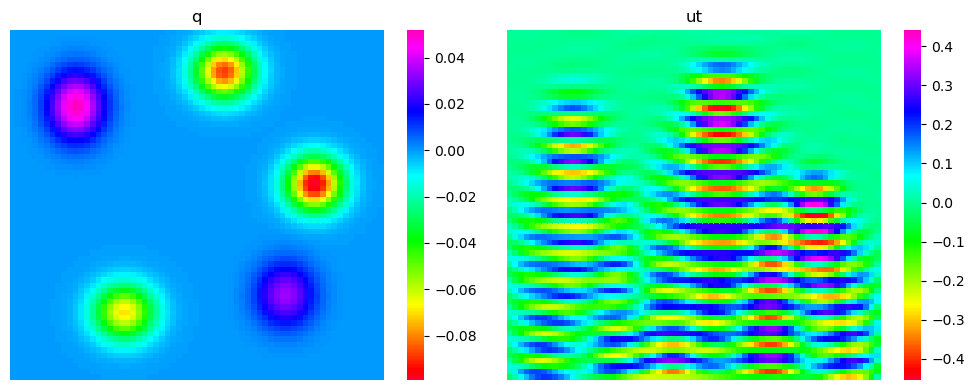

相对误差为0.37%


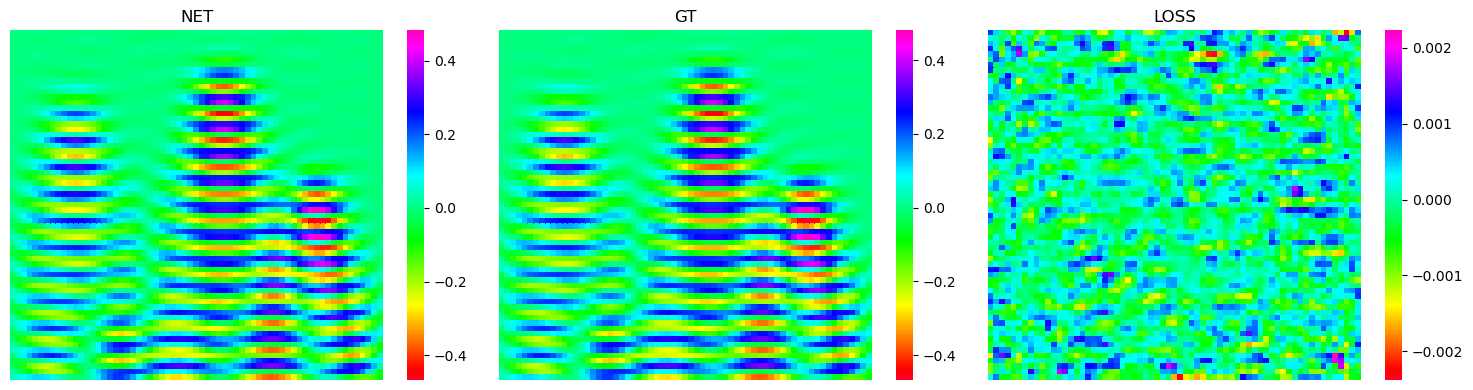

相对误差为0.71%


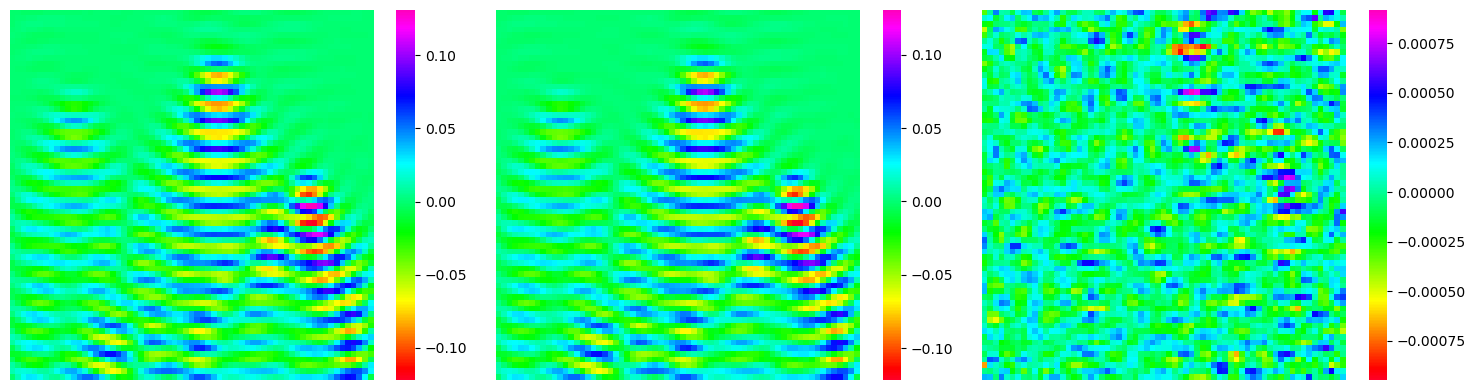

相对误差为1.26%


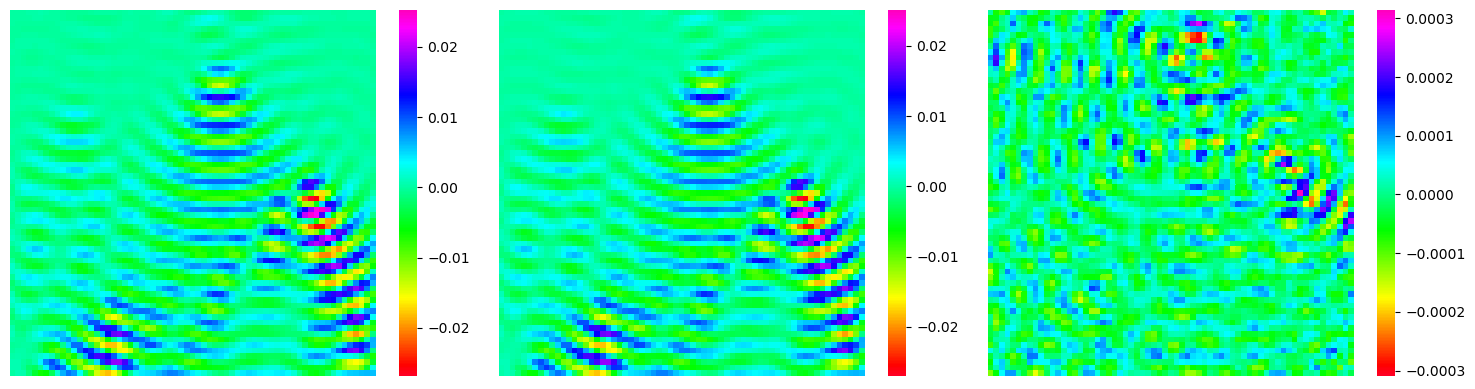

相对误差为2.01%


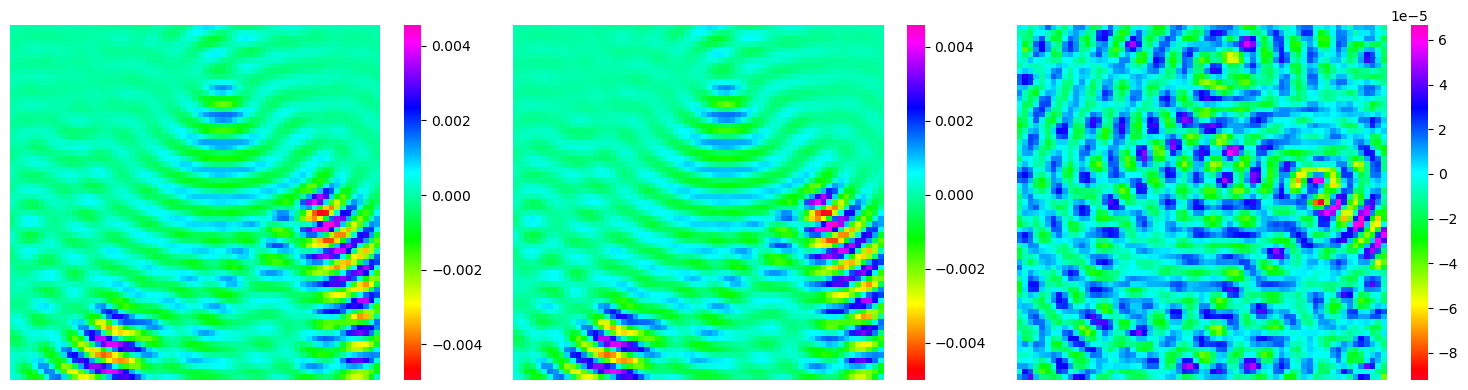

相对误差为3.24%


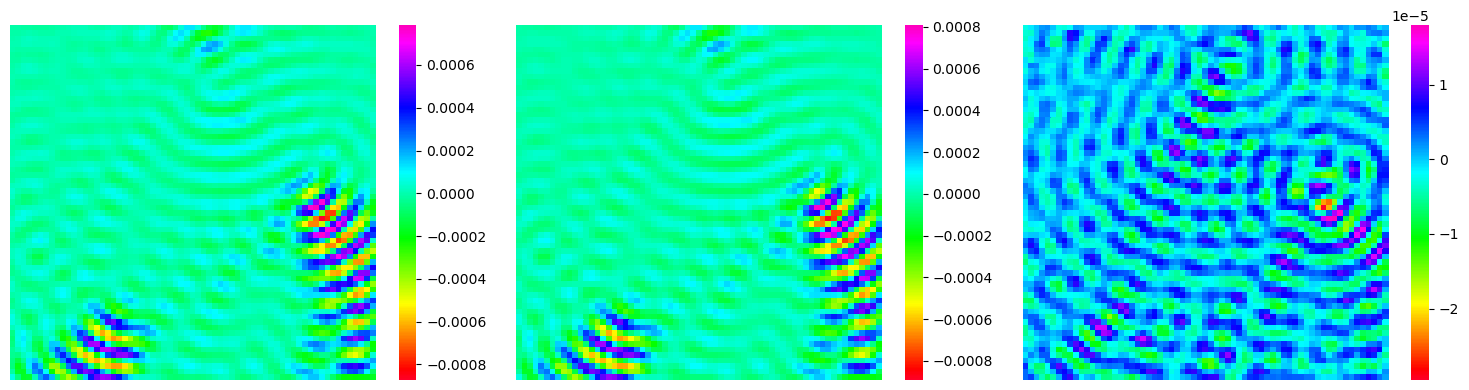

相对误差为4.99%


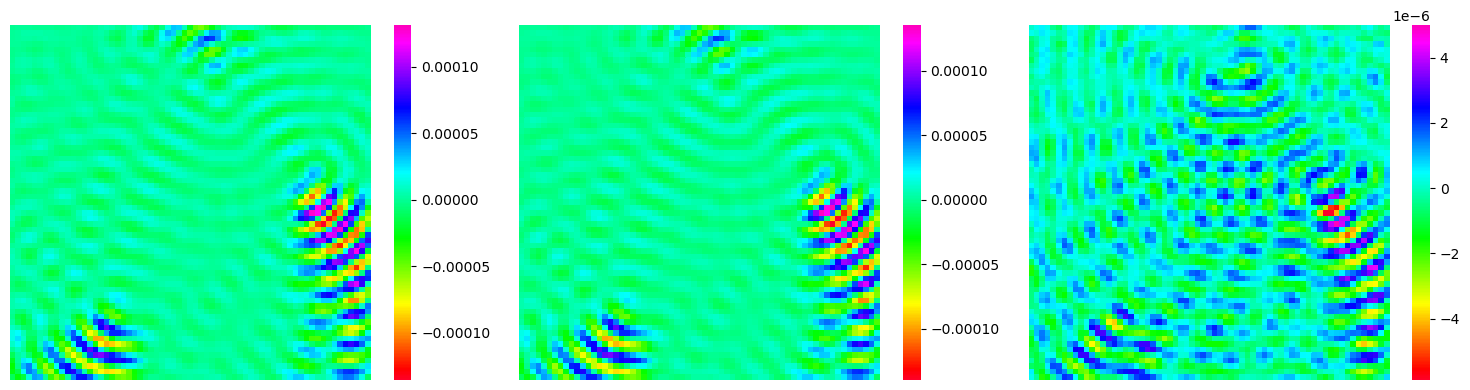

In [5]:
id = 10
heatmap_for_test(q[id,0],u_t[id,0],label_list=['q','ut'],loss=False)
test_U_NET = NET(torch.cat([q[id:(id+1)],wave[id:(id+1)]],1))
heatmap_for_test(test_U_NET[0,1],u_i[id,1],['NET','GT','LOSS'])
for i in range(NS_length):
    test_U_NET = NET(torch.cat([q[id:(id+1)],test_U_NET],1))
    heatmap_for_test(test_U_NET[0,1],u_NS[id,i,1],['','',''])

In [2]:
k = 80
qmethod = 'G'
R = 200
label = 'R200'
angle_total = 64
angle_TYPE = 'P'
angle_for_test_data = 64
angle_for_test_model = 8
angle_mode = 'first'
angle_mode_NET = 'uniform'
NS_return = 'T'
NS_length = 5
ntest = 128
maxq = 0.1
FNO_ARG = (20,32,4)
test_filename = 'k{}_{}_{}_{},{},{}_{}_{}_NS{}_{}'.format(k, ntest, angle_TYPE, angle_for_test_data,angle_total,
                                         angle_mode, qmethod, maxq, NS_return, label)
NET_name = 'k{}_{}_{},{},{}_{}_{}_NS{}_{}_{},{},{}'.format(k, angle_TYPE, angle_for_test_model,angle_total,
                                         angle_mode_NET, qmethod, maxq, NS_return, label,
                                         FNO_ARG[0],FNO_ARG[1],FNO_ARG[2])

q, wave, u_i, u_NS, u_t = load_data(test_filename,
                                    device = device, NS_return = NS_return, Usage = 'Test')
NET_name += '_1'
NET = torch.load('/data/liuziyang/Programs/pde_solver/Network/' 
                 + NET_name+'.pth',map_location=device)
myloss = LpLoss(size_average=True)

In [3]:
ERRS = []
t = 0.
for order in range(angle_total):
    wave_tmp = wave[order]
    u_t_tmp = u_t[order]
    
    ERR = []
    t_tmp = default_timer()
    U_NET = NET(torch.cat([q,wave_tmp],1))
    t += default_timer()-t_tmp
    SUM_NET = U_NET.clone().detach()
    ERR.append(100*myloss.rel(SUM_NET,u_t_tmp))
    
    for i in range(1,NS_length+1):
        ERR = []
        t_tmp = default_timer()
        U_NET_TMP = U_NET.clone().detach()
        del U_NET
        U_NET = NET(torch.cat([q,U_NET_TMP],1))
        del U_NET_TMP
        t += default_timer()-t_tmp
        SUM_NET_OLD = SUM_NET.clone().detach()
        del SUM_NET
        SUM_NET = SUM_NET_OLD + U_NET
        del SUM_NET_OLD
        ERR.append(100*myloss.rel(SUM_NET,u_t_tmp))
    ERRS.append(min(ERR).item())
print(t)

13.100197097286582


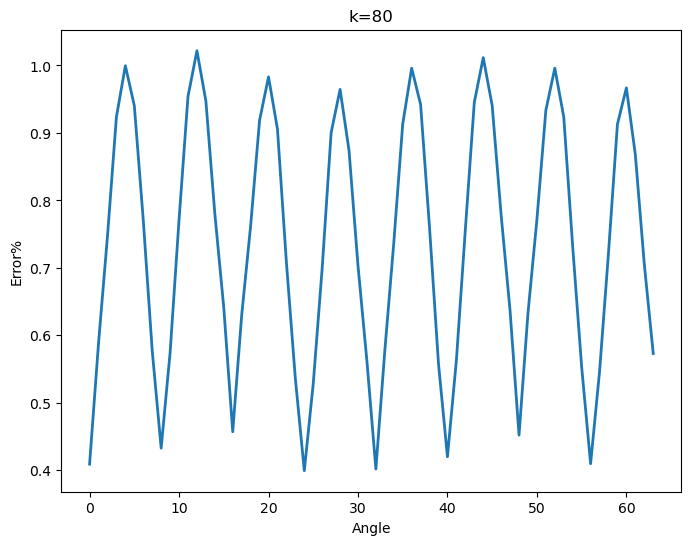

In [4]:
x_values = list(range(64))
y_values = ERRS
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x_values, y_values, linewidth=2)
ax.set_title('k={}'.format(k))
ax.set_xlabel("Angle")
ax.set_ylabel("Error%")
plt.show()

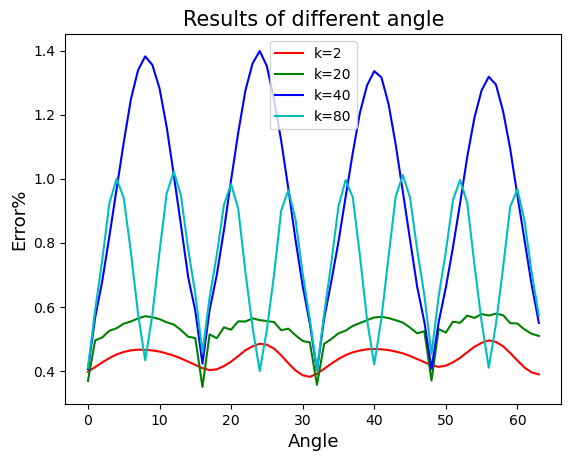

In [7]:
x_values = list(range(64))
y_2 = [0.3975863456726074, 0.4115070104598999, 0.4264858663082123, 0.44016921520233154, 0.4511799216270447, 0.45906421542167664, 0.4641281068325043, 0.46610304713249207, 0.465716689825058, 0.4638027846813202, 0.4601663053035736, 0.4542538821697235, 0.4474669098854065, 0.43876251578330994, 0.42868155241012573, 0.41871997714042664, 0.4086730182170868, 0.4023122489452362, 0.40490344166755676, 0.4149478077888489, 0.4289000630378723, 0.4463786780834198, 0.46424543857574463, 0.47674524784088135, 0.4847685694694519, 0.48170900344848633, 0.4694173038005829, 0.44861024618148804, 0.4240388870239258, 0.40133121609687805, 0.3862273097038269, 0.3812037408351898, 0.3910747468471527, 0.4063199758529663, 0.4224883019924164, 0.43707671761512756, 0.44913068413734436, 0.45798859000205994, 0.4636839032173157, 0.4672989249229431, 0.4681791067123413, 0.46737417578697205, 0.46477770805358887, 0.4603058993816376, 0.45477747917175293, 0.4466923773288727, 0.43681034445762634, 0.4272114038467407, 0.4178220331668854, 0.41240715980529785, 0.41626328229904175, 0.4266505241394043, 0.4408290684223175, 0.45814910531044006, 0.4752449691295624, 0.4874700605869293, 0.49512603878974915, 0.4903651773929596, 0.4768977463245392, 0.4558611512184143, 0.43233808875083923, 0.41031092405319214, 0.395060271024704, 0.3890817165374756]
y_20 = [0.36844831705093384, 0.49501219391822815, 0.5045741200447083, 0.5254016518592834, 0.5330178141593933, 0.5473955869674683, 0.5542754530906677, 0.5636582374572754, 0.5707085132598877, 0.5674768090248108, 0.5614391565322876, 0.5515778660774231, 0.5447365641593933, 0.5273537039756775, 0.5066062211990356, 0.5023959279060364, 0.34986355900764465, 0.5139847993850708, 0.5019548535346985, 0.5356860756874084, 0.5285853743553162, 0.5547379851341248, 0.5540635585784912, 0.5639687180519104, 0.5582674145698547, 0.5556901097297668, 0.5522685647010803, 0.5269611477851868, 0.531721830368042, 0.5111520290374756, 0.49332407116889954, 0.48893874883651733, 0.3563416302204132, 0.4842448830604553, 0.4992300570011139, 0.5172803997993469, 0.5255820751190186, 0.540238618850708, 0.5493097901344299, 0.5584165453910828, 0.5667003989219666, 0.5686590671539307, 0.5649332404136658, 0.5582412481307983, 0.5506119728088379, 0.5352678894996643, 0.5171869397163391, 0.5236592292785645, 0.36972710490226746, 0.5305642485618591, 0.5195614099502563, 0.5536031723022461, 0.549863338470459, 0.5726489424705505, 0.5653000473976135, 0.5776585340499878, 0.5727220177650452, 0.5786774158477783, 0.5739315152168274, 0.5489073991775513, 0.5478290915489197, 0.5292338728904724, 0.5155547261238098, 0.5090958476066589]
y_40 = [0.40553054213523865, 0.5656614899635315, 0.6806747317314148, 0.8208150267601013, 0.9676573872566223, 1.1132780313491821, 1.2479428052902222, 1.3388572931289673, 1.3819849491119385, 1.3552324771881104, 1.28196120262146, 1.161594033241272, 1.010413408279419, 0.8538471460342407, 0.6930664777755737, 0.5872700810432434, 0.4224746525287628, 0.5904096364974976, 0.6997126936912537, 0.8392363786697388, 0.995989978313446, 1.1441820859909058, 1.2753722667694092, 1.3597856760025024, 1.398982048034668, 1.3514021635055542, 1.246314287185669, 1.11830472946167, 0.9689233303070068, 0.8092835545539856, 0.6656665802001953, 0.5477704405784607, 0.4010837972164154, 0.5633046627044678, 0.6790837049484253, 0.8027361631393433, 0.9430323839187622, 1.0804595947265625, 1.2061902284622192, 1.29169499874115, 1.3358118534088135, 1.3164589405059814, 1.2333027124404907, 1.106111764907837, 0.9592112302780151, 0.8096013069152832, 0.6624471545219421, 0.5528333187103271, 0.40657249093055725, 0.5517112612724304, 0.6599999070167542, 0.7861353158950806, 0.9242695569992065, 1.0691505670547485, 1.190614104270935, 1.2757039070129395, 1.3183119297027588, 1.2939796447753906, 1.2111159563064575, 1.0930287837982178, 0.9478277564048767, 0.8077194690704346, 0.6679428219795227, 0.5497669577598572]
y_80 = [0.4091554284095764, 0.5884932279586792, 0.7469857931137085, 0.9238407015800476, 0.9996053576469421, 0.9403505325317383, 0.7710350751876831, 0.5775065422058105, 0.43295082449913025, 0.5744860768318176, 0.7715318202972412, 0.9540955424308777, 1.0218329429626465, 0.9471721649169922, 0.780208945274353, 0.6408905386924744, 0.45723453164100647, 0.6297053098678589, 0.7622400522232056, 0.9186522364616394, 0.9830713272094727, 0.9057642817497253, 0.708014726638794, 0.5358838438987732, 0.3994410037994385, 0.5285001993179321, 0.6999514698982239, 0.900411069393158, 0.9645733833312988, 0.8737763166427612, 0.7035743594169617, 0.5616293549537659, 0.4018833041191101, 0.5774154663085938, 0.736841082572937, 0.9130752682685852, 0.9959834814071655, 0.9420698285102844, 0.7591731548309326, 0.5578328967094421, 0.42012640833854675, 0.5632942914962769, 0.756788969039917, 0.9451603293418884, 1.0115967988967896, 0.940573513507843, 0.7784948348999023, 0.6363562345504761, 0.4521922767162323, 0.6327972412109375, 0.7717319130897522, 0.9335728287696838, 0.9960260987281799, 0.9236400723457336, 0.7314253449440002, 0.553388237953186, 0.4098847508430481, 0.5460717678070068, 0.7219210863113403, 0.9129276275634766, 0.9667484760284424, 0.867939293384552, 0.705933690071106, 0.5731207132339478]
plt.title("Results of different angle",fontsize=15)
plt.xlabel("Angle",fontsize=13)
plt.ylabel("Error%",fontsize=13)

plt.plot(x_values, y_2, 'r', label = 'k=2')
plt.plot(x_values, y_20, 'g', label = 'k=20')
plt.plot(x_values, y_40, 'b', label = 'k=40')
plt.plot(x_values, y_80, 'c', label = 'k=80')
# plt.ylim(0,20)
plt.legend()
plt.show()